In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Download the dataset from Kaggle
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/download

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving stroke.csv to stroke (1).csv


In [ ]:
df = pd.read_csv('stroke.csv')

# The first 5 instances of the dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Drop the 'id' column as it is irrelevant in the prediction
df = df.drop('id', axis=1)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Provides the data type of all attributes and the number of NOT NULL values count is obtained
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


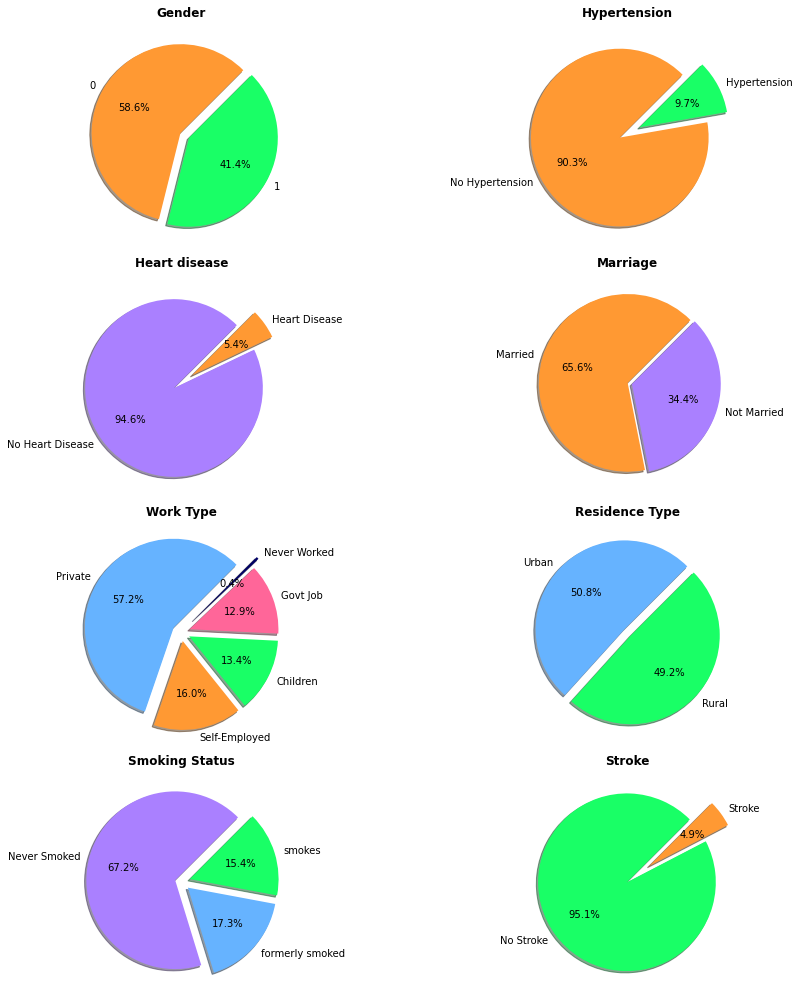

In [ ]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = df['gender'].value_counts().index.tolist()[:2]
values = df['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True, startangle=45,explode=[0.01, 0.1])
ax1.set_title("Gender", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Hypertension", "Hypertension"]
values = df['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True,startangle=45,explode=[0.1, 0.15])
ax2.set_title("Hypertension", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Heart Disease", "Heart Disease"]
values = df['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AA80FF','#FF9933'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Heart disease", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Married", "Not Married"]
values = df['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#FF9933','#AA80FF'],shadow=True,startangle=45,explode=[0, 0.05])
ax4.set_title("Marriage", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Private", "Self-Employed", "Children", "Govt Job", "Never Worked"]
values = df['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Urban", "Rural"]
values = df['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#19FF66'],shadow=True,startangle=45,explode=[0.05, 0.05])
ax6.set_title("Residence Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Never Smoked", "formerly smoked", "smokes"]
values = df['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[ 0.07, 0.1, 0.1],colors=['#AA80FF','#66b3ff','#19FF66','#FF6699'])
ax7.set_title("Smoking Status", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Stroke", "Stroke"]
values = df['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.01, 0.3],colors=['#19FF66','#FF9933'])
ax8.set_title("Stroke", fontdict={'fontsize': 12},fontweight ='bold')


plt.tight_layout()
plt.show()

In [ ]:
df['smoking_status'].replace('Unknown', np.nan, inplace=True)

In [ ]:
df.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [ ]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace = True)

In [ ]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
#     print(le.classes_)
    return le.transform(feat)

In [ ]:
for col in df.columns:
    df[str(col)] = label_encoded(df[str(col)])

gender ['Female' 'Male' 'Other']
age [8.00e-02 1.60e-01 2.40e-01 3.20e-01 4.00e-01 4.80e-01 5.60e-01 6.40e-01
 7.20e-01 8.00e-01 8.80e-01 1.00e+00 1.08e+00 1.16e+00 1.24e+00 1.32e+00
 1.40e+00 1.48e+00 1.56e+00 1.64e+00 1.72e+00 1.80e+00 1.88e+00 2.00e+00
 3.00e+00 4.00e+00 5.00e+00 6.00e+00 7.00e+00 8.00e+00 9.00e+00 1.00e+01
 1.10e+01 1.20e+01 1.30e+01 1.40e+01 1.50e+01 1.60e+01 1.70e+01 1.80e+01
 1.90e+01 2.00e+01 2.10e+01 2.20e+01 2.30e+01 2.40e+01 2.50e+01 2.60e+01
 2.70e+01 2.80e+01 2.90e+01 3.00e+01 3.10e+01 3.20e+01 3.30e+01 3.40e+01
 3.50e+01 3.60e+01 3.70e+01 3.80e+01 3.90e+01 4.00e+01 4.10e+01 4.20e+01
 4.30e+01 4.40e+01 4.50e+01 4.60e+01 4.70e+01 4.80e+01 4.90e+01 5.00e+01
 5.10e+01 5.20e+01 5.30e+01 5.40e+01 5.50e+01 5.60e+01 5.70e+01 5.80e+01
 5.90e+01 6.00e+01 6.10e+01 6.20e+01 6.30e+01 6.40e+01 6.50e+01 6.60e+01
 6.70e+01 6.80e+01 6.90e+01 7.00e+01 7.10e+01 7.20e+01 7.30e+01 7.40e+01
 7.50e+01 7.60e+01 7.70e+01 7.80e+01 7.90e+01 8.00e+01 8.10e+01 8.20e+01]
hypertension 

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,0,1
1,0,82,0,0,1,3,0,3588,162,1,1
2,1,101,0,1,1,2,0,2483,199,1,1
3,0,70,0,0,1,2,1,3385,218,2,1
4,0,100,1,0,1,3,0,3394,113,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,1,0
5106,0,102,0,0,1,3,1,3030,274,1,0
5107,0,56,0,0,1,3,0,1314,180,1,0
5108,1,72,0,0,1,2,0,3363,129,0,0


In [ ]:
#People who have not had a stroke
stroke_False = df[df['stroke'] == 0]

stroke_False.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,1,24,0,0,0,4,0,1986,53,1,0
250,1,79,1,0,1,2,1,1604,266,1,0
251,0,29,0,0,0,2,1,2663,49,1,0
252,0,91,0,0,1,2,0,528,233,0,0
253,1,35,0,0,0,1,0,3340,64,1,0


In [ ]:
print('People who have not had a stroke in percentage-',len(stroke_False)/len(df)*100,'%')

People who have not had a stroke in percentage- 95.12720156555773 %


In [ ]:
#People who have had a stroke
stroke_True = df[df['stroke'] == 1]

stroke_True.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,0,1
1,0,82,0,0,1,3,0,3588,162,1,1
2,1,101,0,1,1,2,0,2483,199,1,1
3,0,70,0,0,1,2,1,3385,218,2,1
4,0,100,1,0,1,3,0,3394,113,1,1


In [ ]:
print('People who have had a stroke in percentage-',len(stroke_True)/len(df)*100,'%')

People who have had a stroke in percentage- 4.87279843444227 %


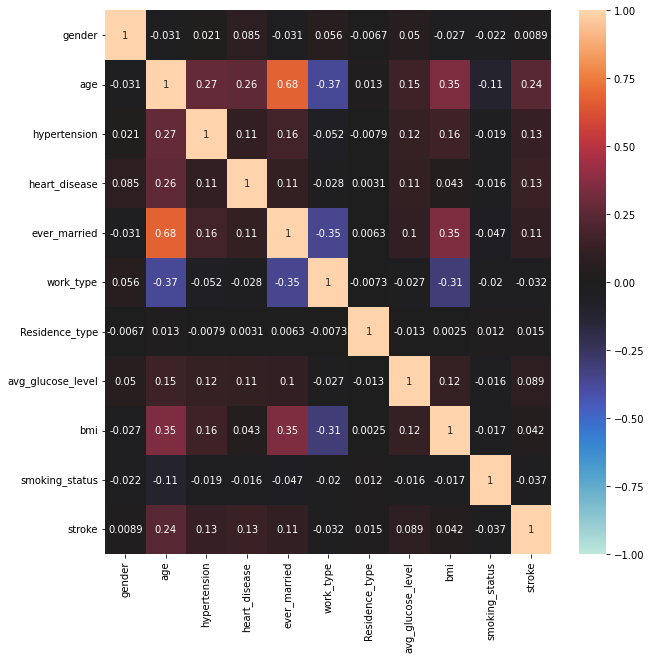

In [ ]:
#Correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='icefire', annot=True);

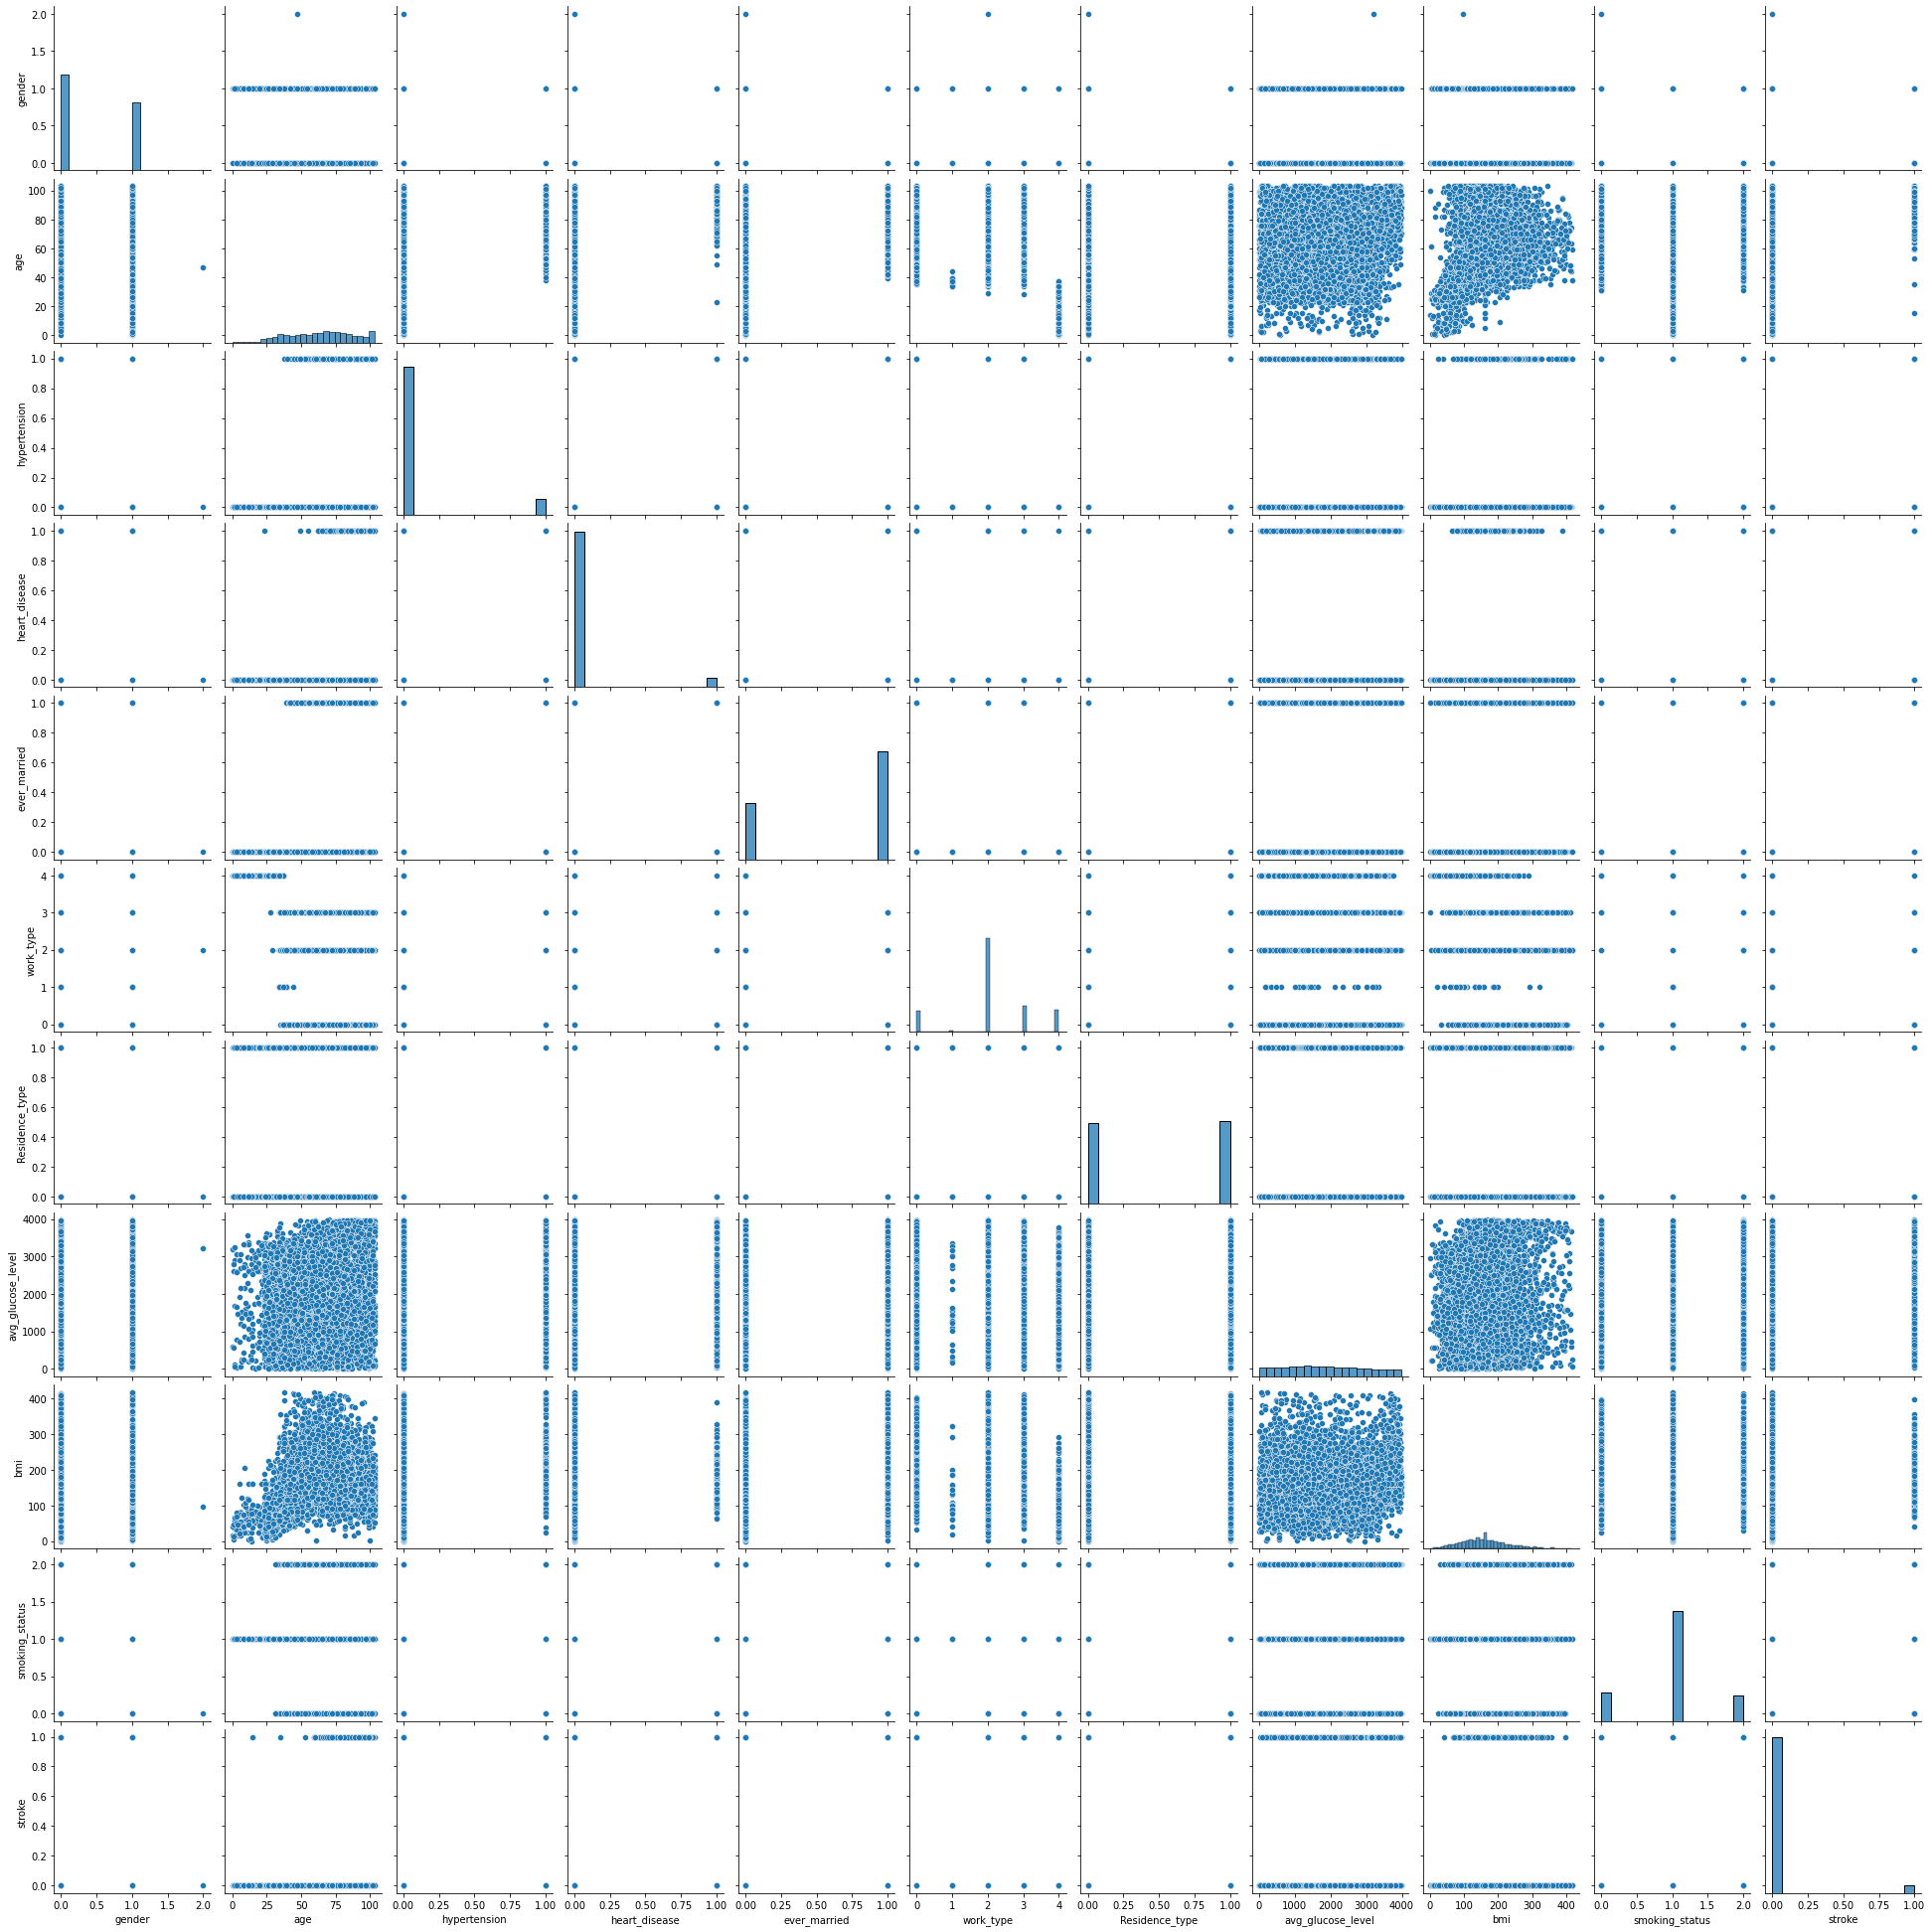

In [ ]:
sns.pairplot(df)

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,0,1
1,0,82,0,0,1,3,0,3588,162,1,1
2,1,101,0,1,1,2,0,2483,199,1,1
3,0,70,0,0,1,2,1,3385,218,2,1
4,0,100,1,0,1,3,0,3394,113,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,1,0
5106,0,102,0,0,1,3,1,3030,274,1,0
5107,0,56,0,0,1,3,0,1314,180,1,0
5108,1,72,0,0,1,2,0,3363,129,0,0


In [ ]:
#Drop the target label i.e. the stroke column
X = df.drop(['stroke'],axis =1)

X


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,88,0,1,1,2,1,3850,240,0
1,0,82,0,0,1,3,0,3588,162,1
2,1,101,0,1,1,2,0,2483,199,1
3,0,70,0,0,1,2,1,3385,218,2
4,0,100,1,0,1,3,0,3394,113,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,1
5106,0,102,0,0,1,3,1,3030,274,1
5107,0,56,0,0,1,3,0,1314,180,1
5108,1,72,0,0,1,2,0,3363,129,0


In [ ]:
y = df['stroke']

y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
#Now we need to split trained data and split data i.e. divide data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state= 42)

In [ ]:
# Checking the size of the splits 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (3577, 10)
y_train: (3577,)
X_test: (1533, 10)
y_test: (1533,)


**Decision Tree**

In [ ]:
#Train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

decision_tree = DecisionTreeClassifier()   #Instantiate an  classifier object out of our class
decision_tree=decision_tree.fit(X_train,y_train)      #Training the classifier 
#predicting result using the test dataset
y_pred = decision_tree.predict(X_test)

# Printing the accuracyof the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9080234833659491


In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

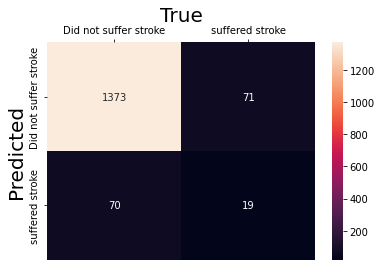

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('True', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Did not suffer stroke','suffered stroke'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Predicted', fontsize=20)
ax.yaxis.set_ticklabels(['Did not suffer stroke', 'suffered stroke'], fontsize = 10)
plt.show()

**KNN**

In [ ]:
#importing the KNN Classifier module
from sklearn.neighbors import KNeighborsClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn=knn.fit(X_train,y_train)
#predicting result using the test dataset
y_pred = knn.predict(X_test)
# Printing the accuracyof the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9386823222439661


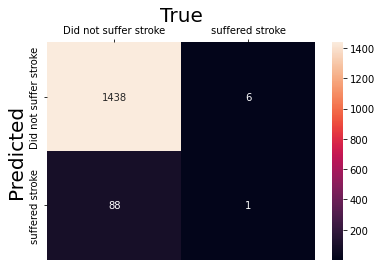

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('True', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Did not suffer stroke','suffered stroke'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Predicted', fontsize=20)
ax.yaxis.set_ticklabels(['Did not suffer stroke', 'suffered stroke'], fontsize = 10)
plt.show()

**XGBoost**

In [ ]:
#importing the XGBoost Classifier module
from xgboost  import XGBClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
xgb = XGBClassifier()
# Training the classifier
xgb=xgb.fit(X_train,y_train)
#predicting result using the test dataset
y_pred= xgb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9419439008480104


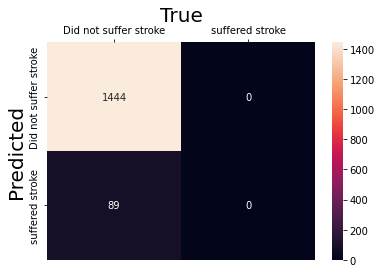

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('True', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Did not suffer stroke','suffered stroke'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Predicted', fontsize=20)
ax.yaxis.set_ticklabels(['Did not suffer stroke', 'suffered stroke'], fontsize = 10)
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf_clf =rf_clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = rf_clf.predict(X_test)

# Printing accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9412915851272016


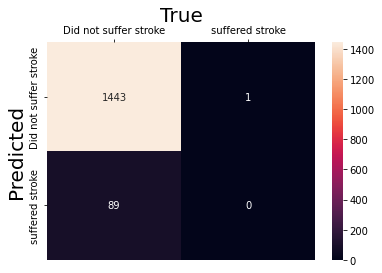

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('True', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Did not suffer stroke','suffered stroke'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('Predicted', fontsize=20)
ax.yaxis.set_ticklabels(['Did not suffer stroke', 'suffered stroke'], fontsize = 10)
plt.show()